In [3]:
import numpy as np
from scipy.special import hermite
from scipy.integrate import simpson
from math import lgamma
import matplotlib.pyplot as plt
import pandas as pd
import os, glob, re

color_palette = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

save_plots = False

### Plots for FFTW testing

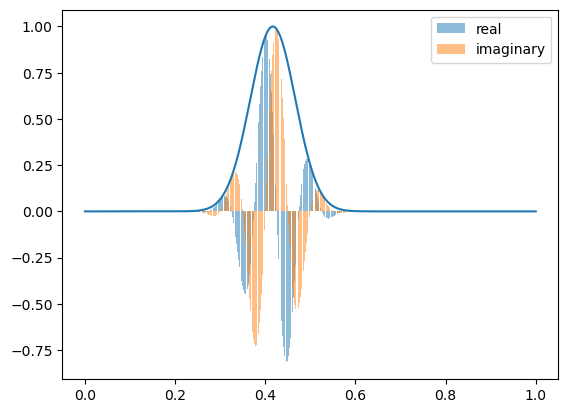

In [7]:
# grid
grid_x = np.loadtxt("results/init.dat", max_rows=1)
dx = grid_x[1]-grid_x[0]

# initialized function
re_init, im_init = np.loadtxt("results/init.dat", skiprows=1, unpack=True)
init = re_init + im_init*1j

plt.bar(x=grid_x, height=np.real(init), label="real", alpha=0.5, width=0.8*dx)
plt.bar(x=grid_x, height=np.imag(init), label="imaginary", alpha=0.5, width=0.8*dx)
plt.plot(grid_x, np.abs(init))
plt.legend()

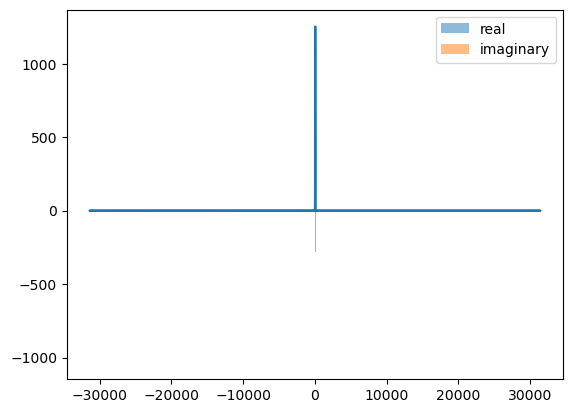

In [8]:
# grid
grid_p = np.loadtxt("results/FFT_init.dat", max_rows=1)
dp = grid_p[1]-grid_p[0]

# FFT
re_FFT, im_FFT = np.loadtxt("results/FFT_init.dat", skiprows=1, unpack=True)
FFT_init = re_FFT + im_FFT*1j

plt.bar(x=grid_p, height=np.real(FFT_init), label="real", alpha=0.5, width=0.8*dp)
plt.bar(x=grid_p, height=np.imag(FFT_init), label="imaginary", alpha=0.5, width=0.8*dp)
plt.plot(grid_p, np.abs(FFT_init))
plt.legend()

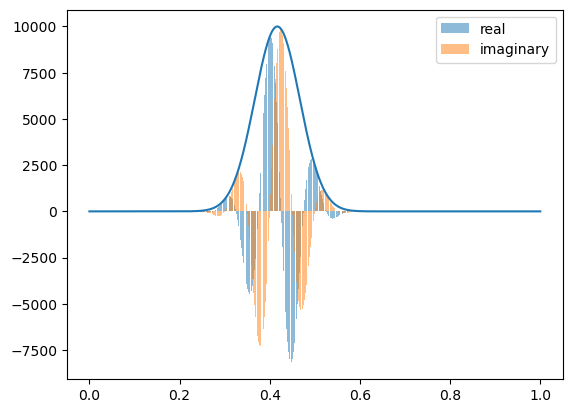

In [9]:
# grid
grid_x = np.loadtxt("results/FFT_inverse.dat", max_rows=1)
dx = grid_x[1]-grid_x[0]

# inverse FFT to get the original function
re_inverse, im_inverse = np.loadtxt("results/FFT_inverse.dat", skiprows=1, unpack=True)
FFT_inverse = re_inverse + im_inverse*1j

plt.bar(x=grid_x, height=np.real(FFT_inverse), label="real", alpha=0.5, width=0.8*dx)
plt.bar(x=grid_x, height=np.imag(FFT_inverse), label="imaginary", alpha=0.5, width=0.8*dx)
plt.plot(grid_x, np.abs(FFT_inverse))
plt.legend()

### Plots for actual exercise 5

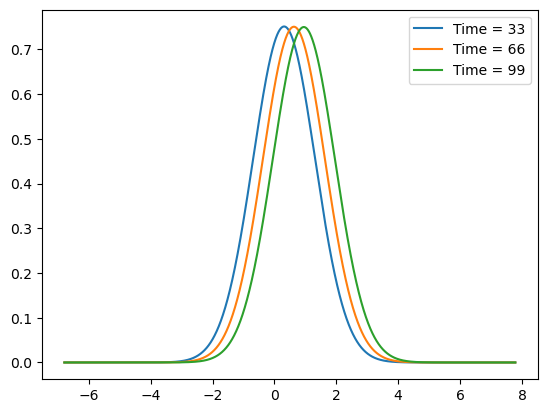

In [26]:
dir_path = r'results/outWF_*.dat'
files = glob.glob(dir_path)
files.sort()

for file_ in files:
    time_idx = int(re.match("results/outWF_([0-9]*).dat", file_).group(1))

    # grid
    grid_x = np.loadtxt(file_, max_rows=1)
    dx = grid_x[1]-grid_x[0]

    # initialized function
    re_wf, im_wf = np.loadtxt(file_, skiprows=1, unpack=True)
    wf = re_wf + im_wf*1j

    plt.plot(grid_x, np.abs(wf), label=f"Time = {time_idx}")

plt.legend()

In [49]:
dir_path = r'results/outWF_*.dat'
files = glob.glob(dir_path)
files.sort()
wf_hist = []

for file_ in files:
    time_idx = int(re.match("results/outWF_([0-9]*).dat", file_).group(1))

    # grid
    grid_x = np.loadtxt(file_, max_rows=1)
    dx = grid_x[1]-grid_x[0]

    # initialized function
    re_wf, im_wf = np.loadtxt(file_, skiprows=1, unpack=True)
    wf = re_wf + im_wf*1j

    wf_hist.append(np.abs(wf)**2)


wf_hist = np.array(wf_hist)

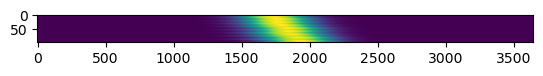

In [53]:
plt.imshow(wf_hist, aspect=2.0)